In [209]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [195]:
os.getcwd()

'C:\\Users\\theri\\Desktop\\streaming_datasets'

In [210]:
prime_df = pd.read_csv('resources/amazon_prime_titles.csv')
disney_df = pd.read_csv('resources/disney_plus_titles.csv')
hulu_df = pd.read_csv('resources/hulu_titles.csv')
netflix_df = pd.read_csv('resources/netflix_titles.csv')

In [197]:
prime_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [211]:
disney_df_new = disney_df.copy()
prime_df_new = prime_df.copy()
hulu_df_new = hulu_df.copy()
netflix_df_new = netflix_df.copy()

In [212]:
disney_df_new[['genre1', 'genre2', 'genre3']] = disney_df.listed_in.str.split(',', expand=True)
prime_df_new[['genre1', 'genre2', 'genre3', 'genre4', 'genre5']] = prime_df.listed_in.str.split(',', expand=True)
hulu_df_new[['genre1', 'genre2', 'genre3']] = hulu_df.listed_in.str.split(',', expand=True)
netflix_df_new[['genre1', 'genre2', 'genre3']] = netflix_df.listed_in.str.split(',', expand=True)

In [200]:
prime_df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre1,genre2,genre3,genre4,genre5
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Comedy,Drama,None,None,None
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Drama,International,None,None,None
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Action,Drama,Suspense,None,None
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Documentary,None,None,None,None
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Drama,Fantasy,None,None,None


In [213]:
netflix_df_new.drop(['show_id', 
                     'type',
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)
disney_df_new.drop(['show_id',  
                     'type',
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)
prime_df_new.drop(['show_id',  
                     'type',
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)
hulu_df_new.drop(['show_id',  
                     'type',
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)

In [214]:
prime_df_new['Service'] = "Prime"
netflix_df_new['Service'] = "Netflix"
hulu_df_new['Service'] = "Hulu"
disney_df_new['Service'] = "Disney"

In [258]:
netflix_df_new.drop(['genre2', 
                     'genre3'], axis=1, inplace=True)
disney_df_new.drop(['genre2', 
                     'genre3'], axis=1, inplace=True)
prime_df_new.drop(['genre2', 
                     'genre3',
                     'genre4', 
                     'genre5'], axis=1, inplace=True)
hulu_df_new.drop(['genre2', 
                     'genre3'], axis=1, inplace=True)

In [263]:
netflix_df_new.to_csv(r'genres/netflix_genres.csv', index = False)
disney_df_new.to_csv(r'genres/disney_genres.csv', index = False)
prime_df_new.to_csv(r'genres/prime_genres.csv', index = False)
hulu_df_new.to_csv(r'genres/hulu_genres.csv', index = False)

In [261]:
frames = [prime_df_new, netflix_df_new, hulu_df_new, disney_df_new]

result = pd.concat(frames)
result.to_csv(r'genres/genres.csv', index = False)

In [271]:
netflix_df_new.head()

,title,genre1,Service
0,Dick Johnson Is Dead,Documentaries,Netflix
1,Blood & Water,International TV Shows,Netflix
2,Ganglands,Crime TV Shows,Netflix
3,Jailbirds New Orleans,Docuseries,Netflix
4,Kota Factory,International TV Shows,Netflix


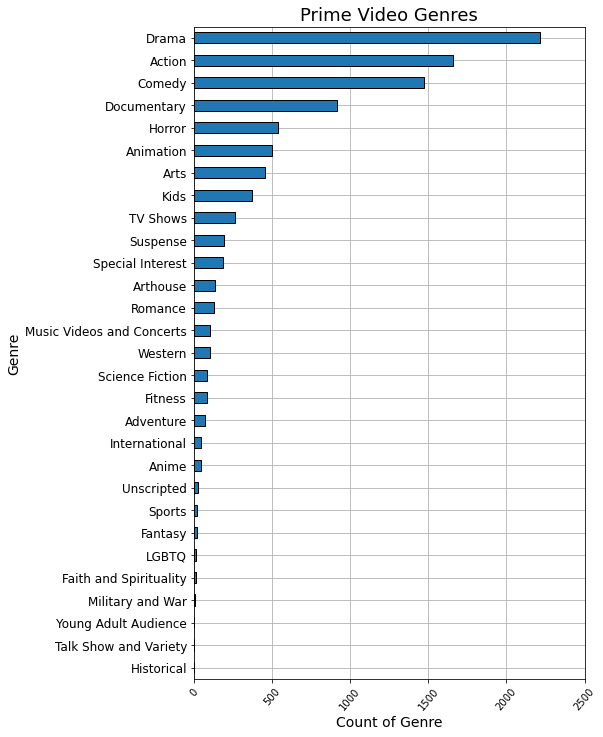

In [264]:
prime_genres = prime_df_new.genre1.value_counts(ascending=True)
prime_genres.plot(kind = "barh",zorder=5,grid=True,legend=False,edgecolor="black", figsize=(7,12))
plt.xticks(size=10, rotation=50)
plt.yticks(size=12)
plt.ylabel("Genre", size=14)
plt.xlabel("Count of Genre", size=14)
plt.title("Prime Video Genres", size=18)
axes = plt.gca()
axes.set_xlim([0,2500])
plt.savefig("genres/prime_genres.jpg", bbox_inches='tight')

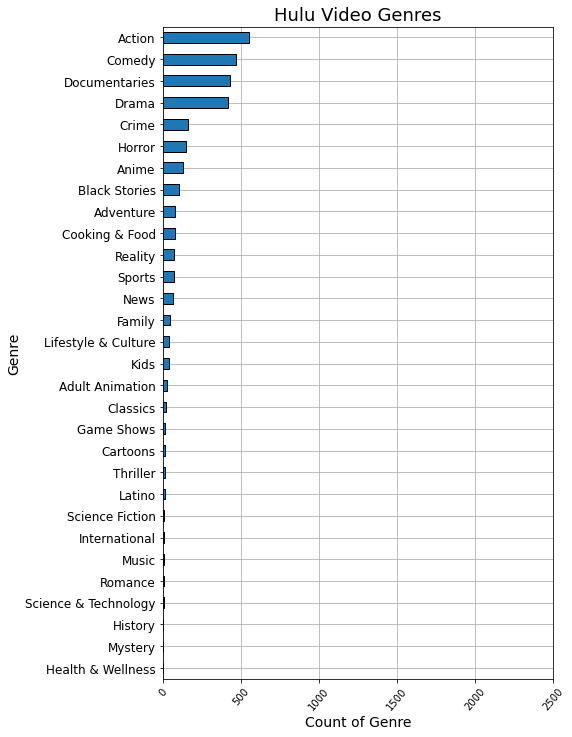

In [265]:
hulu_genres = hulu_df_new.genre1.value_counts(ascending=True)
hulu_genres.plot(kind = "barh",zorder=5,grid=True,legend=False,edgecolor="black", figsize=(7,12))
plt.xticks(size=10, rotation=50)
plt.yticks(size=12)
plt.ylabel("Genre", size=14)
plt.xlabel("Count of Genre", size=14)
plt.title("Hulu Video Genres", size=18)
axes = plt.gca()
axes.set_xlim([0,2500])
plt.savefig("genres/hulu_genres.jpg", bbox_inches='tight')

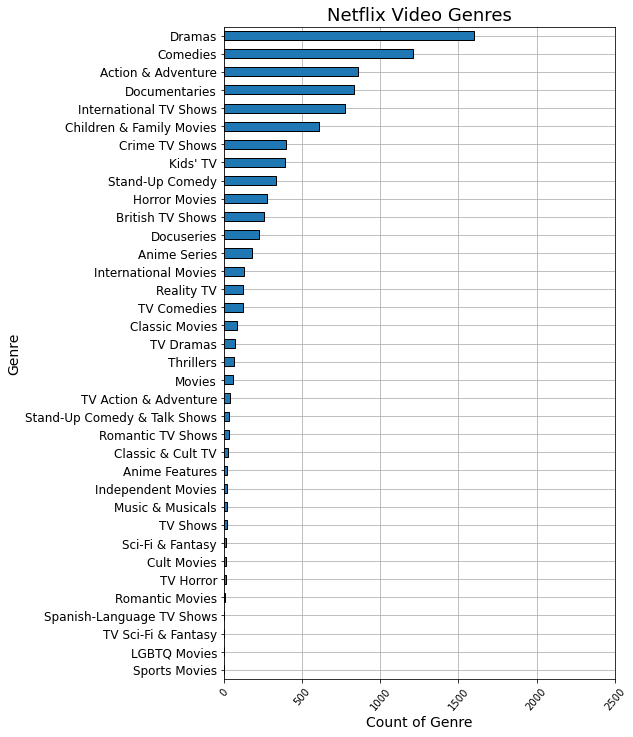

In [266]:
netflix_genres = netflix_df_new.genre1.value_counts(ascending=True)
netflix_genres.plot(kind = "barh",zorder=5,grid=True,legend=False,edgecolor="black", figsize=(7,12))
plt.xticks(size=10, rotation=50)
plt.yticks(size=12)
plt.ylabel("Genre", size=14)
plt.xlabel("Count of Genre", size=14)
plt.title("Netflix Video Genres", size=18)
axes = plt.gca()
axes.set_xlim([0,2500])
plt.savefig("genres/netflix_genres.jpg", bbox_inches='tight')

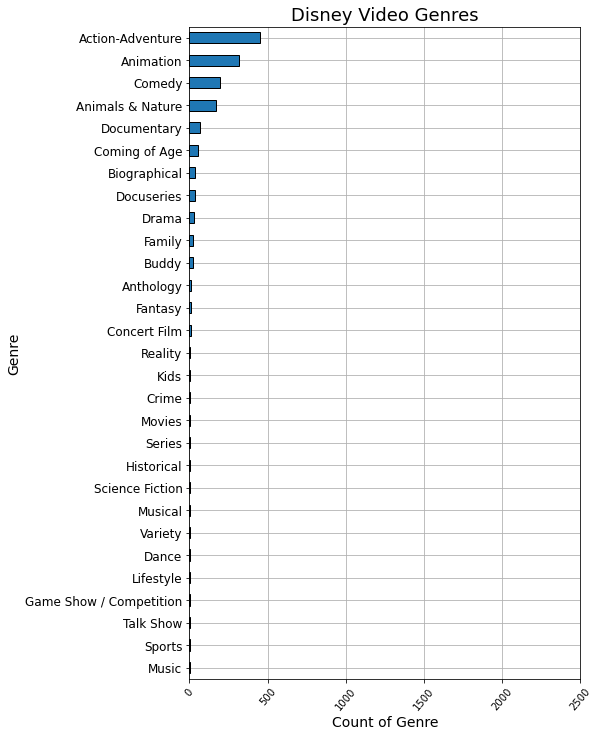

In [267]:
disney_genres = disney_df_new.genre1.value_counts(ascending=True)
disney_genres.plot(kind = "barh",zorder=5,grid=True,legend=False,edgecolor="black", figsize=(7,12))
plt.xticks(size=10, rotation=50)
plt.yticks(size=12)
plt.ylabel("Genre", size=14)
plt.xlabel("Count of Genre", size=14)
plt.title("Disney Video Genres", size=18)
axes = plt.gca()
axes.set_xlim([0,2500])
plt.savefig("genres/disney_genres.jpg", bbox_inches='tight')

In [219]:
disney_df_type = disney_df.copy()
prime_df_type = prime_df.copy()
hulu_df_type = hulu_df.copy()
netflix_df_type = netflix_df.copy()

In [221]:
disney_df_type.drop(['show_id',
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)
prime_df_type.drop(['show_id',  
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)
hulu_df_type.drop(['show_id',  
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)
netflix_df_type.drop(['show_id',  
                     'director', 
                     'cast', 
                     'country', 
                     'date_added', 
                     'release_year',
                     'rating',
                     'duration',
                     'listed_in',
                     'description'], axis=1, inplace=True)

In [222]:
netflix_df_type.head()

,type,title
0,Movie,Dick Johnson Is Dead
1,TV Show,Blood & Water
2,TV Show,Ganglands
3,TV Show,Jailbirds New Orleans
4,TV Show,Kota Factory


In [223]:
netflix_df_type.to_csv(r'type/netflix_type.csv', index = False)
disney_df_type.to_csv(r'type/disney_type.csv', index = False)
prime_df_type.to_csv(r'type/prime_type.csv', index = False)
hulu_df_type.to_csv(r'type/hulu_type.csv', index = False)

In [224]:
frames = [netflix_df_type, disney_df_type, prime_df_type, hulu_df_type]

result = pd.concat(frames)
result.to_csv(r'type/types.csv', index = False)

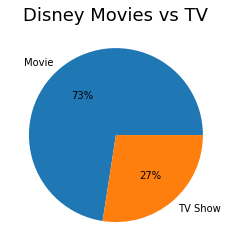

In [269]:
disney_pie = disney_df_type["type"].value_counts()

disney_pie.plot(kind="pie", autopct="%1.0f%%")
plt.ylabel("")
plt.title("Disney Movies vs TV", size=18)
plt.savefig("type/disney_pie.png")

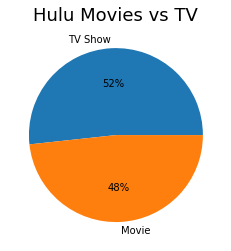

In [230]:
hulu_pie = hulu_df_type["type"].value_counts()

hulu_pie.plot(kind="pie", autopct="%1.0f%%")
plt.ylabel("")
plt.title("Hulu Movies vs TV", size=18)
plt.savefig("type/hulu_pie.jpg")

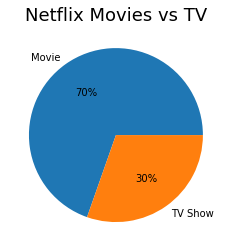

In [231]:
netflix_pie = netflix_df_type["type"].value_counts()

netflix_pie.plot(kind="pie", autopct="%1.0f%%")
plt.ylabel("")
plt.title("Netflix Movies vs TV", size=18)
plt.savefig("type/netflix_pie.jpg")

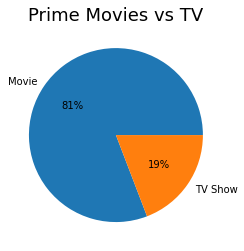

In [232]:
prime_pie = prime_df_type["type"].value_counts()

prime_pie.plot(kind="pie", autopct="%1.0f%%")
plt.ylabel("")
plt.title("Prime Movies vs TV", size=18)
plt.savefig("type/prime_pie.jpg")

In [254]:
disney_df[['genre1', 'genre2', 'genre3']] = disney_df.listed_in.str.split(',', expand=True)
prime_df[['genre1', 'genre2', 'genre3', 'genre4', 'genre5']] = prime_df.listed_in.str.split(',', expand=True)
hulu_df[['genre1', 'genre2', 'genre3']] = hulu_df.listed_in.str.split(',', expand=True)
netflix_df[['genre1', 'genre2', 'genre3']] = netflix_df.listed_in.str.split(',', expand=True)

In [255]:
prime_df['Service'] = "Prime"
netflix_df['Service'] = "Netflix"
hulu_df['Service'] = "Hulu"
disney_df['Service'] = "Disney"

In [256]:
frames = [netflix_df, disney_df, prime_df, hulu_df]

result = pd.concat(frames)
result.to_csv(r'resources/combined.csv', index = False)